Load Dataset
=================

In [28]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torchmetrics import Accuracy, Precision, Recall



In [29]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(),download=True)
batch_size=100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression,self).__init__()
        self.linear=torch.nn.Linear(input_dim,output_dim)

    def forward(self,x):
        outputs=torch.sigmoid(self.linear(x))
        return outputs

In [31]:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

We initialize the logistic regression model
=================================================

In [32]:
model = LogisticRegression(input_dim, output_dim)

In [33]:
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy

In [34]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [35]:
# Instantiate metric objects
accuracy = Accuracy(num_classes=10,average='macro',task='multiclass')
precision = Precision(num_classes=10, average='macro',task='multiclass')
recall = Recall(num_classes=10, average='macro',task='multiclass')
acc_list = []
prec_list = []
rec_list = []

Train
========

In [36]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            acc = accuracy(predicted, labels)
            prec = precision(predicted, labels)
            rec = recall(predicted, labels)
            # Store metrics in lists
            acc_list.append(acc.item())
            prec_list.append(prec.item())
            rec_list.append(rec.item())
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2688817977905273. Accuracy: MulticlassAccuracy().
Iteration: 1000. Loss: 2.237848997116089. Accuracy: MulticlassAccuracy().
Iteration: 1500. Loss: 2.213473320007324. Accuracy: MulticlassAccuracy().
Iteration: 2000. Loss: 2.180295467376709. Accuracy: MulticlassAccuracy().
Iteration: 2500. Loss: 2.1763923168182373. Accuracy: MulticlassAccuracy().
Iteration: 3000. Loss: 2.1364572048187256. Accuracy: MulticlassAccuracy().


In [41]:
print(rec_list)

[0.3904551863670349, 0.393307089805603, 0.525189220905304, 0.6876435279846191, 0.6712987422943115, 0.7214826941490173]


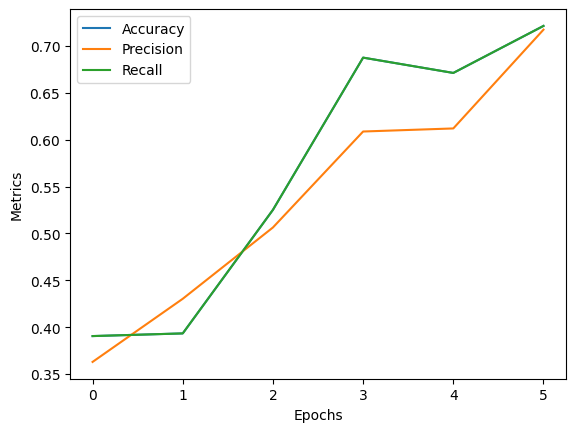

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(acc_list, label='Accuracy')
plt.plot(prec_list, label='Precision')
plt.plot(rec_list, label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()